## API 

API stands for Application Programme Interface. It acts as an intermediary between 2 application that seek to comminucate with each other. APIs have a client and a server, a client is the application or programme submitting the request and the server is the appication that is sending the response to the initial request.

In [54]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '20746e55-da93-4345-88b5-f12bcaaf5ef8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [55]:
import pandas as pd

In [56]:
#JSON Normalise

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc = True)

In [57]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10478,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949661e+07,1.949661e+07,...,48.9306,5.511421e+11,None,2023-09-26T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:03:19.537673+00:00
1,1027,Ethereum,ETH,ethereum,7440,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202324e+08,1.202324e+08,...,18.2786,1.910373e+11,None,2023-09-26T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:03:19.537673+00:00
2,825,Tether USDt,USDT,tether,62842,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320788e+10,8.642620e+10,...,7.9578,8.638741e+10,None,2023-09-26T20:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-26 20:03:19.537673+00:00
3,1839,BNB,BNB,bnb,1639,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538471e+08,1.538471e+08,...,3.1209,3.261833e+10,None,2023-09-26T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:03:19.537673+00:00
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,...,2.5723,5.049098e+10,None,2023-09-26T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:03:19.537673+00:00
5,3408,USDC,USDC,usd-coin,14231,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.562666e+10,2.562666e+10,...,2.4519,2.562590e+10,None,2023-09-26T20:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-26 20:03:19.537673+00:00
6,2010,Cardano,ADA,cardano,939,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.512527e+10,3.619858e+10,...,0.8220,1.100616e+10,None,2023-09-26T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:03:19.537673+00:00
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411683e+11,1.411683e+11,...,0.8158,8.529883e+09,None,2023-09-26T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:03:19.537673+00:00
8,5426,Solana,SOL,solana,531,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.128772e+08,5.584590e+08,...,0.7595,1.073686e+10,None,2023-09-26T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:03:19.537673+00:00
9,1958,TRON,TRX,tron,840,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, dwf-labs-por...",NaN,8.910599e+10,8.910606e+10,...,0.7216,7.544511e+09,None,2023-09-26T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:03:19.537673+00:00


In [81]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '20746e55-da93-4345-88b5-f12bcaaf5ef8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now', utc=True)
    df_append = pd.DataFrame(df)
    df = pd.concat([df,df_append])
    
    
    if not os.path.isfile(r'/Users/joshuaobi/Desktop/python/API.csv'):
        df.to_csv(r'/Users/joshuaobi/Desktop/python/API.csv', header = 'column_names')
    else: 
            df.to_csv(r'/Users/joshuaobi/Desktop/python/API.csv', mode = 'a', header = False)



In [83]:
#Automating the above function

import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [127]:
df72 = pd.read_csv(r'/Users/joshuaobi/Desktop/python/API.csv')
df72.head(50)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10478,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0000,19496693.0000,...,48.9264,550680403594.5100,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
1,1,1027,Ethereum,ETH,ethereum,7440,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120232366.3604,...,18.2731,190945529163.9900,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
2,2,825,Tether USDt,USDT,tether,62842,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83207883380.7006,...,7.9600,86395611060.2000,NaN,2023-09-26T20:27:00.000Z,1027.0000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-26 20:29:23.504890+00:00
3,3,1839,BNB,BNB,bnb,1639,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153847108.1188,...,3.1213,32616592732.3400,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
4,4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0000,53245240268.0000,...,2.5666,50371220021.0800,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
5,5,3408,USDC,USDC,usd-coin,14231,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25603946516.9881,...,2.4505,25606325758.3500,NaN,2023-09-26T20:27:00.000Z,1027.0000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-26 20:29:23.504890+00:00
6,6,2010,Cardano,ADA,cardano,939,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.0000,35125636818.7330,...,0.8220,11004768620.0500,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
7,7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141169436383.7053,...,0.8157,8526396107.5200,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
8,8,5426,Solana,SOL,solana,531,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,412877088.7488,...,0.7587,10728316974.7900,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
9,9,1958,TRON,TRX,tron,840,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'dwf-l...",NaN,89105317581.9981,...,0.7214,7540583958.1200,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00


In [88]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [90]:
df72.head(5)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10478,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0000,19496693.0000,...,48.9264,550680403594.5100,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
1,1,1027,Ethereum,ETH,ethereum,7440,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120232366.3604,...,18.2731,190945529163.9900,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
2,2,825,Tether USDt,USDT,tether,62842,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83207883380.7006,...,7.9600,86395611060.2000,NaN,2023-09-26T20:27:00.000Z,1027.0000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-26 20:29:23.504890+00:00
3,3,1839,BNB,BNB,bnb,1639,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153847108.1188,...,3.1213,32616592732.3400,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00
4,4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0000,53245240268.0000,...,2.5666,50371220021.0800,NaN,2023-09-26T20:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-26 20:29:23.504890+00:00


In [95]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_90d']].mean()

In [96]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,0.1192,-0.4710,-3.4455,0.5115,-12.7072
Ethereum,0.1630,-0.1210,-3.2033,-3.9836,-13.1889
Tether USDt,-0.0057,-0.0350,-0.0762,-0.0100,-0.0580
BNB,0.0956,0.8617,-2.3037,-3.0762,-7.3413
XRP,-0.2168,-0.1113,-1.7846,-4.0331,9.3495
USDC,-0.0016,-0.0024,-0.0120,-0.0044,-0.0040
Cardano,0.0839,-0.2582,-4.2633,-6.8319,-8.7534
Dogecoin,0.1192,-0.9798,-3.4488,-4.1732,-2.2486
Solana,0.2038,-1.5948,-3.4550,-7.3802,21.0377


In [97]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h      0.1192
          quote.USD.percent_change_24h    -0.4710
          quote.USD.percent_change_7d     -3.4455
          quote.USD.percent_change_30d     0.5115
          quote.USD.percent_change_90d   -12.7072
                                           ...   
Litecoin  quote.USD.percent_change_1h     -0.0273
          quote.USD.percent_change_24h    -0.8551
          quote.USD.percent_change_7d     -5.1140
          quote.USD.percent_change_30d    -2.1834
          quote.USD.percent_change_90d   -22.4879
Length: 75, dtype: float64

In [98]:
type(df4)

pandas.core.series.Series

In [100]:
df5 = df4.to_frame(name='values')

In [101]:
df5

values
name                                          
Bitcoin  quote.USD.percent_change_1h    0.1192
         quote.USD.percent_change_24h  -0.4710
         quote.USD.percent_change_7d   -3.4455
         quote.USD.percent_change_30d   0.5115
         quote.USD.percent_change_90d -12.7072
...                                        ...
Litecoin quote.USD.percent_change_1h   -0.0273
         quote.USD.percent_change_24h  -0.8551
         quote.USD.percent_change_7d   -5.1140
         quote.USD.percent_change_30d  -2.1834
         quote.USD.percent_change_90d -22.4879

[75 rows x 1 columns]

In [108]:
index = pd.Index(range(len(df5.index)))

In [112]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.1192
1,Bitcoin,quote.USD.percent_change_24h,-0.4710
2,Bitcoin,quote.USD.percent_change_7d,-3.4455
3,Bitcoin,quote.USD.percent_change_30d,0.5115
4,Bitcoin,quote.USD.percent_change_90d,-12.7072
...,...,...,...
70,Litecoin,quote.USD.percent_change_1h,-0.0273
71,Litecoin,quote.USD.percent_change_24h,-0.8551
72,Litecoin,quote.USD.percent_change_7d,-5.1140
73,Litecoin,quote.USD.percent_change_30d,-2.1834


In [113]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.1192
1,Bitcoin,quote.USD.percent_change_24h,-0.4710
2,Bitcoin,quote.USD.percent_change_7d,-3.4455
3,Bitcoin,quote.USD.percent_change_30d,0.5115
4,Bitcoin,quote.USD.percent_change_90d,-12.7072
...,...,...,...
70,Litecoin,quote.USD.percent_change_1h,-0.0273
71,Litecoin,quote.USD.percent_change_24h,-0.8551
72,Litecoin,quote.USD.percent_change_7d,-5.1140
73,Litecoin,quote.USD.percent_change_30d,-2.1834


In [115]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.1192
1,Bitcoin,24h,-0.4710
2,Bitcoin,7d,-3.4455
3,Bitcoin,30d,0.5115
4,Bitcoin,90d,-12.7072
...,...,...,...
70,Litecoin,1h,-0.0273
71,Litecoin,24h,-0.8551
72,Litecoin,7d,-5.1140
73,Litecoin,30d,-2.1834


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

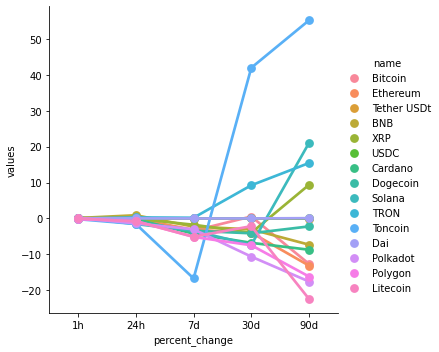

In [118]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [124]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df72 = df[['name','quote.USD.price','Timestamp']]
# df10 = df10.query("name == 'Bitcoin'")
df72

,name,quote.USD.price,Timestamp
0,Bitcoin,26224.0489,2023-09-26 20:32:34.453158+00:00
1,Ethereum,1588.2384,2023-09-26 20:32:34.453158+00:00
2,Tether USDt,0.9996,2023-09-26 20:32:34.453158+00:00
3,BNB,211.9507,2023-09-26 20:32:34.453158+00:00
4,XRP,0.5035,2023-09-26 20:32:34.453158+00:00
5,USDC,1.0000,2023-09-26 20:32:34.453158+00:00
6,Cardano,0.2445,2023-09-26 20:32:34.453158+00:00
7,Dogecoin,0.0604,2023-09-26 20:32:34.453158+00:00
8,Solana,19.2082,2023-09-26 20:32:34.453158+00:00
9,TRON,0.0846,2023-09-26 20:32:34.453158+00:00


In [1]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)

NameError: name 'sns' is not defined